In [3]:
import anndata as ad
import scanpy as sc

In [105]:
d1 = ad.read_h5ad("data/batcheffect_dataseta0.h5ad")
d2 = ad.read_h5ad("data/batcheffect_datasetb0.h5ad")
d1.X = d1.X.toarray()
d2.X = d2.X.toarray()
d1.uns["iroot"] = int(d1.uns["iroot"][4:])
d2.uns["iroot"] = int(d2.uns["iroot"][4:])

In [106]:
def preprocess_data(d):
    sc.pp.normalize_total(d, target_sum=1e4)
    sc.pp.scale(d, max_value=10)
    sc.tl.pca(d, svd_solver="arpack")
    sc.pp.neighbors(d, random_state=98)
    return d

def remove_milestone(d, milestone = "sEndC"):
    d = d[d.obs["milestones"] != milestone]
    return d

def compute_plotting(d):
    sc.tl.umap(d, random_state=342)
    sc.tl.leiden(d)
    sc.tl.paga(d)
    return d

def plot(d):
    sc.pl.umap(d, color=["leiden", "milestones"])


/home/louise/Work/dynchro/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/louise/Work/dynchro/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


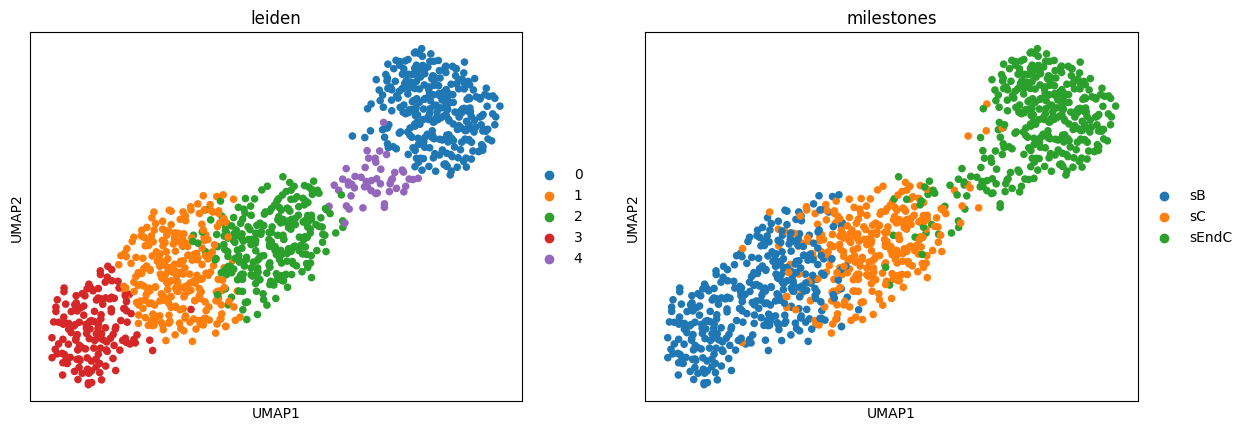

In [107]:
preprocess_data(d1)
compute_plotting(d1)
plot(d1)

/home/louise/Work/dynchro/lib/python3.11/site-packages/scanpy/preprocessing/_normalization.py:170: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)
/home/louise/Work/dynchro/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/louise/Work/dynchro/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


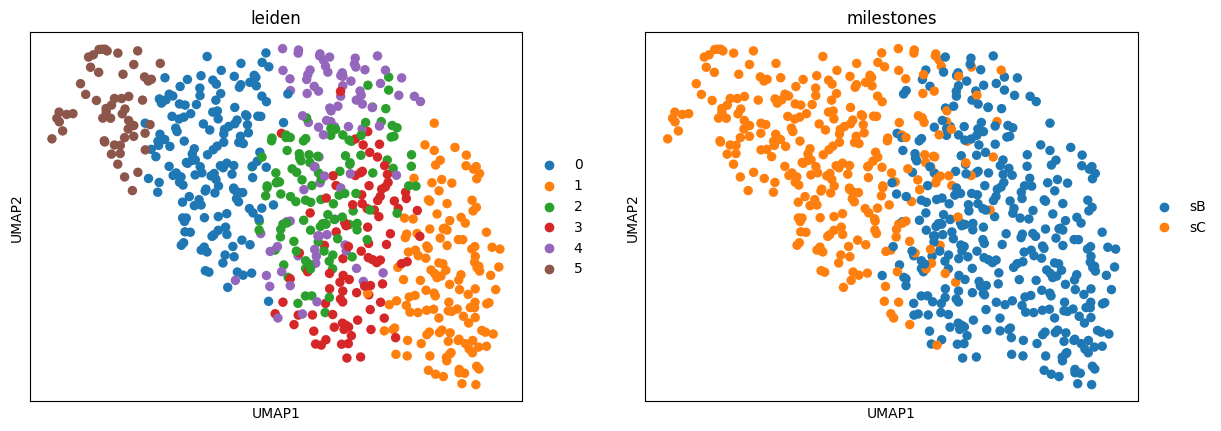

In [108]:
d2 = remove_milestone(d2, milestone = "sEndC")
preprocess_data(d2)
compute_plotting(d2)
plot(d2)

In [109]:
import scanorama
adatas_cor = scanorama.correct_scanpy([d1, d2], return_dimred=True)

Found 121 genes among all datasets
[[0.         0.99845679]
 [0.         0.        ]]
Processing datasets (0, 1)


In [110]:
adata_spatial = sc.concat(
    {"control": adatas_cor[0], "premature stop": adatas_cor[1]},
    label="batch",
    uns_merge="unique",
    index_unique="-",
)

In [111]:
sc.pp.neighbors(adata_spatial, use_rep="X_scanorama")
sc.tl.umap(adata_spatial)
sc.tl.leiden(adata_spatial, key_added="clusters")

/home/louise/Work/dynchro/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/louise/Work/dynchro/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


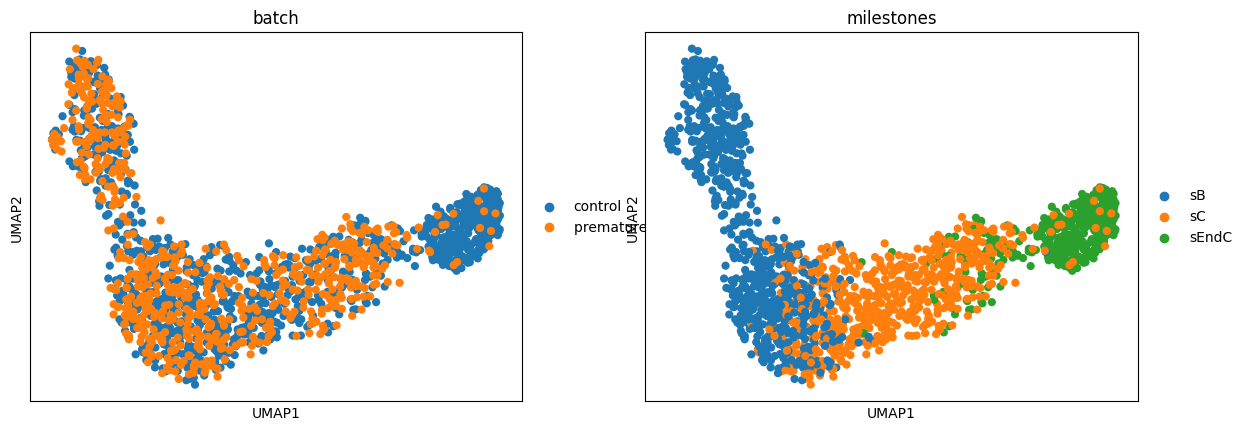

In [114]:
sc.pl.umap(adata_spatial, color = ["batch", "milestones"], size = 140)


/home/louise/Work/dynchro/lib/python3.11/site-packages/anndata/_core/anndata.py:1830: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/home/louise/Work/dynchro/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/louise/Work/dynchro/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


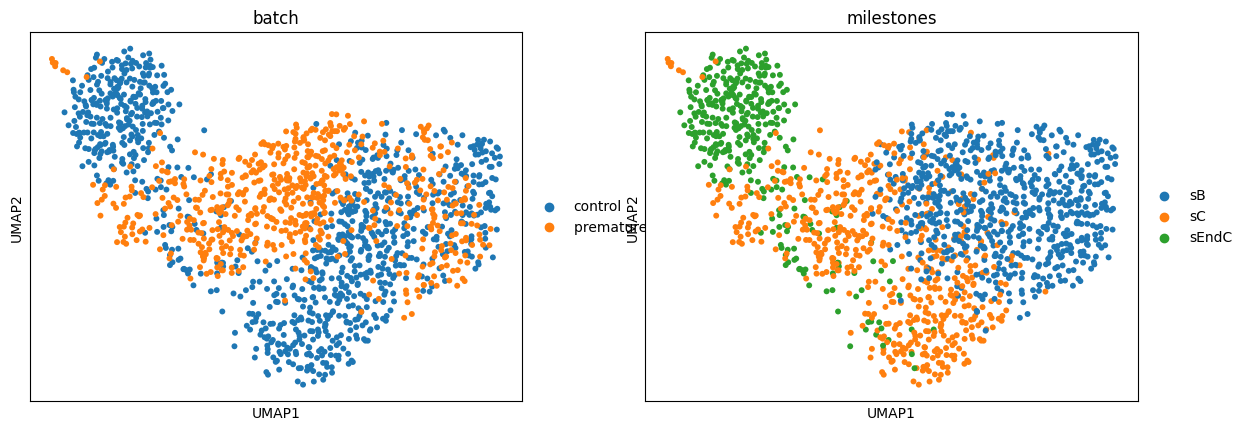

In [116]:
ds0s = {"control": d1, "premature stop": d2}
ds0 = ad.concat(ds0s, label = "batch")
ds0.obs_names_make_unique()
ds0_raw = ds0.copy()
sc.pp.neighbors(ds0_raw)
sc.tl.umap(ds0_raw)
sc.pl.umap(ds0_raw, color = ["batch", "milestones"])

/home/louise/Work/dynchro/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/louise/Work/dynchro/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


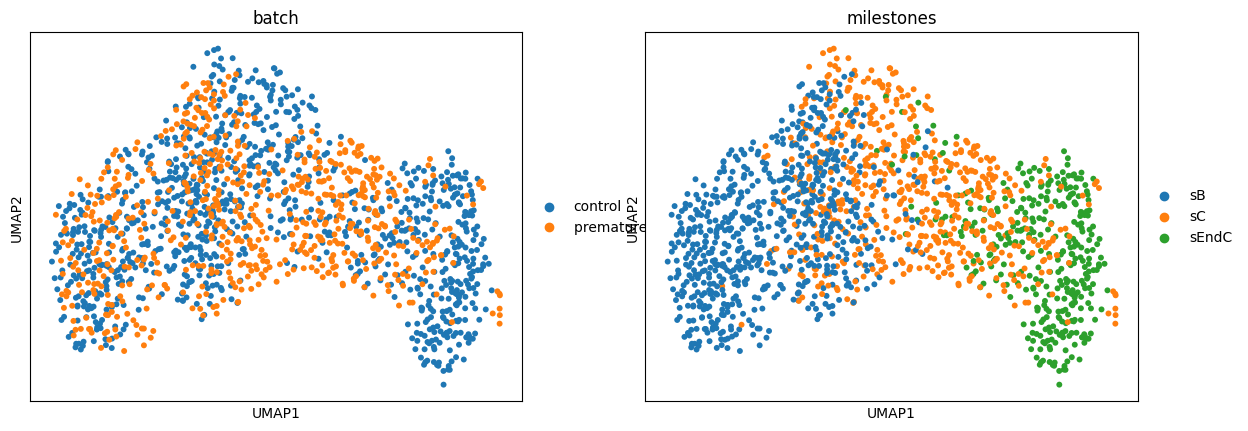

In [119]:
sc.external.pp.bbknn(ds0, batch_key='batch')  # running bbknn 1.3.6
sc.tl.umap(ds0)
sc.pl.umap(ds0, color = ["batch", "milestones"])

/home/louise/Work/dynchro/lib/python3.11/site-packages/scanpy/preprocessing/_normalization.py:197: UserWarning: Some cells have zero counts
  warn(UserWarning('Some cells have zero counts'))
/home/louise/Work/dynchro/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  cax = scatter(


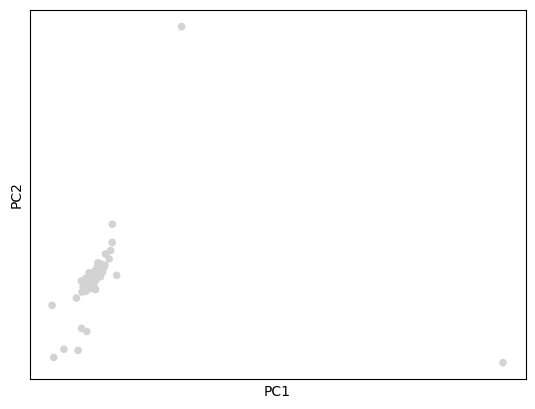

/home/louise/Work/dynchro/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  cax = scatter(


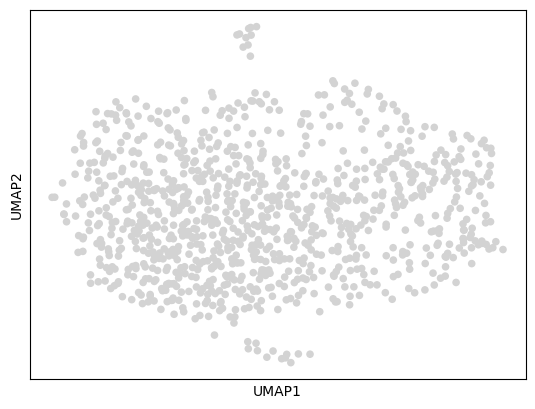

In [90]:
plot_data(d1)

/home/louise/Work/dynchro/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  cax = scatter(


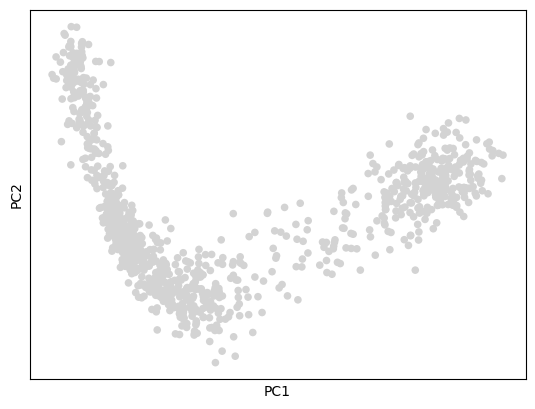

/home/louise/Work/dynchro/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  cax = scatter(


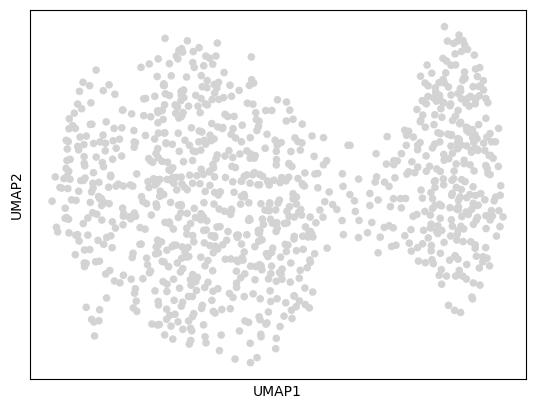

In [86]:
plot_data(d2)

In [39]:
d1_root = d1.uns["iroot"]
int(d1_root[4:])

334

In [36]:
d1.obs_names

Index(['cell1', 'cell2', 'cell3', 'cell4', 'cell5', 'cell6', 'cell7', 'cell8',
       'cell9', 'cell10',
       ...
       'cell991', 'cell992', 'cell993', 'cell994', 'cell995', 'cell996',
       'cell997', 'cell998', 'cell999', 'cell1000'],
      dtype='object', length=1000)

In [34]:
d1.uns["iroot"]

'cell334'